# Software, Development, Programming, and Algorithms Part 2 (Data Analytics) 
## Global Covid-19 Cases By Country

# Import the necessary python packages 

In [1]:
import requests # Import requests to pull the global covid-19 data from the webpage url
import pandas as pd # Import pandas data library 


# Data ( Live Covid-19 API)
### Summary of the data, variable areas of interest, and where the data comes from.
The data used is live covid-19 data extracted from a covid-19 API endpoint, the data updates the latest figures when the API is called. The data extratcted from this API is sourced from John Hopkins University Center for Systems Science and Engineering. This API contains data sourced from World Health Organisation, European Centre for Disease Prevention and Control (ECDC) and covid tracking project. The reason why this data is of particular interest is becaus it contains data on the latest global covid-19 cases accross 197 global countries. The variables of interest are the new confirmed, total confirmed, new deaths, and total deaths cases for 197 global countrys throughout the world. Moreover, the reason for this analysis is to analyse covid-19 case data accross 197 different countrys. Through the analysis of this data, it can be explored which countrys have the most and least significant new deaths, total deaths, new confirmed cases, and total confirmed cases. In addition, analysis of this data can help to identify what is causing new death cases. For example through the use of ols regression model analysis, it can be used to identify if there is any statistical significance between new deaths, total confirmed cases, total deaths and new confirmed cases. This can be determined through the results of hypothesis testing and analysis the regression coefficients if significant at the 5% significance levels. Furthermore, this data will allow for analysis that can identify if geogrphic location has any effect on covid-19 cases. 

# Step 1: Crawl a real world data set to extract and analyse

In [2]:
url = "https://api.covid19api.com/summary" # Create a variable named url in order to extract data from the target webpage url

In [3]:
r = requests.get(url) # Using the requests package imported , this is to make a GET request from the API endpoint.
# Set the request equal to the variable r

In [4]:
r # Print r to see what has been stoed in r. If the  response code is 200, the request has succeeded

<Response [200]>

In [5]:
json = r.json() # Using the json method, extract the  structured data from the request. 

In [6]:
json # Print the json variable in order to view the structured data from the request. 

{'ID': 'c9bf40d2-fb4b-465b-8f68-fba6778e3355',
 'Message': '',
 'Global': {'NewConfirmed': 348653,
  'TotalConfirmed': 661652292,
  'NewDeaths': 813,
  'TotalDeaths': 6699906,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2023-01-09T16:13:58.875Z'},
 'Countries': [{'ID': '23a7e1da-b5af-478e-8df6-ab27415b5d5f',
   'Country': 'Afghanistan',
   'CountryCode': 'AF',
   'Slug': 'afghanistan',
   'NewConfirmed': 0,
   'TotalConfirmed': 207766,
   'NewDeaths': 0,
   'TotalDeaths': 7850,
   'NewRecovered': 0,
   'TotalRecovered': 0,
   'Date': '2023-01-09T16:13:58.875Z',
   'Premium': {}},
  {'ID': 'c40f7448-1d92-457e-8a34-11576d995ab4',
   'Country': 'Albania',
   'CountryCode': 'AL',
   'Slug': 'albania',
   'NewConfirmed': 29,
   'TotalConfirmed': 333916,
   'NewDeaths': 0,
   'TotalDeaths': 3596,
   'NewRecovered': 0,
   'TotalRecovered': 0,
   'Date': '2023-01-09T16:13:58.875Z',
   'Premium': {}},
  {'ID': 'cefa67c3-17db-4d50-8fe5-b3d1c1c99c57',
   'Country': 'Algeria',
   'Count

In [7]:
json.keys() # Using the keys() method to explore the json variable and keys of the dictionary as a list.

dict_keys(['ID', 'Message', 'Global', 'Countries', 'Date'])

# Step 2: Perform data preparation & any necessary cleaning

### 2.1 Load the dataset in to a pandas data frame

In [8]:
covid_df = pd.DataFrame(json['Countries']) #Load the dataset in to a covid-19 dataframe 
                                          

### 2.2 Print the dataframe

In [9]:
covid_df # Print the data frame to confirm that the dataset has susscfully been loaded in to the data frame
         # There is no missing data to handle
         # There are no outliers or inconsistencies in the data 

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,23a7e1da-b5af-478e-8df6-ab27415b5d5f,Afghanistan,AF,afghanistan,0,207766,0,7850,0,0,2023-01-09T16:13:58.875Z,{}
1,c40f7448-1d92-457e-8a34-11576d995ab4,Albania,AL,albania,29,333916,0,3596,0,0,2023-01-09T16:13:58.875Z,{}
2,cefa67c3-17db-4d50-8fe5-b3d1c1c99c57,Algeria,DZ,algeria,4,271254,0,6881,0,0,2023-01-09T16:13:58.875Z,{}
3,76e4ed21-9bcd-4ffa-ad03-29ba39f91a21,Andorra,AD,andorra,0,47781,0,165,0,0,2023-01-09T16:13:58.875Z,{}
4,cfc253a5-998f-4437-83b5-73da14dca113,Angola,AO,angola,0,105095,0,1930,0,0,2023-01-09T16:13:58.875Z,{}
...,...,...,...,...,...,...,...,...,...,...,...,...
192,aaeb86de-4733-4835-96e4-704ce8083cd7,Venezuela (Bolivarian Republic),VE,venezuela,0,550716,0,5832,0,0,2023-01-09T16:13:58.875Z,{}
193,f5d3f93e-1d88-420a-abb6-f448b1ea8912,Viet Nam,VN,vietnam,65,11525711,0,43186,0,0,2023-01-09T16:13:58.875Z,{}
194,bcb23adb-6755-4fce-9a47-1aa0b019808e,Yemen,YE,yemen,0,11945,0,2159,0,0,2023-01-09T16:13:58.875Z,{}
195,a2aca658-6e6b-48a1-afab-e05dce343aba,Zambia,ZM,zambia,206,335545,3,4028,0,0,2023-01-09T16:13:58.875Z,{}


### 2.3 Reorder the data in the pandas data frame to a order that can be used for analysis
 Check for outliers, missing data, inconsistencies and perform additional steps to enrich the data if required

In [25]:
order = ['Date','Country','NewConfirmed','TotalConfirmed','NewDeaths','TotalDeaths']
covid_df = covid_df[order] # Reorder dataframe by creating a list
                           # This is to remove ID, Country Code, Slug, Date and Premium columns 
                           # which are not necessary for the purpose of this analysis.

### 2.3 Check The Data Type Information
The purpose of the information regaridng the data above is to confirm the data type. The extracted data in the covid_df data frame is the correct type for analysis. 

In [81]:
covid_df.info() # Produces information on the data type in each column of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            197 non-null    object
 1   Country         197 non-null    object
 2   NewConfirmed    197 non-null    int64 
 3   TotalConfirmed  197 non-null    int64 
 4   NewDeaths       197 non-null    int64 
 5   TotalDeaths     197 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.4+ KB


### 2.4 Convert the extracted data to CSV format

In [78]:
covid_df.to_csv(r'C:\Users\judit\OneDrive\Documents\GitHub\SDPA_fixed\SDPA_KeiranGreen95\SDPA_Coursework\SDPA_Part2.csv') #This code converts the extracted data from the pandas data frame in to a csv file in the GitHub repository

### 2.5 Display the entire data set in the pandas data frame by changing the default settings

In [27]:
pd.set_option("display.max_rows",197) # Change default settings to display all rows in the data frame
covid_df

,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths
0,2023-01-09T16:13:58.875Z,Afghanistan,0,207766,0,7850
1,2023-01-09T16:13:58.875Z,Albania,29,333916,0,3596
2,2023-01-09T16:13:58.875Z,Algeria,4,271254,0,6881
3,2023-01-09T16:13:58.875Z,Andorra,0,47781,0,165
4,2023-01-09T16:13:58.875Z,Angola,0,105095,0,1930
5,2023-01-09T16:13:58.875Z,Antarctica,0,11,0,0
6,2023-01-09T16:13:58.875Z,Antigua and Barbuda,0,9106,0,146
7,2023-01-09T16:13:58.875Z,Argentina,0,9963697,0,130171
8,2023-01-09T16:13:58.875Z,Armenia,0,445976,0,8716
9,2023-01-09T16:13:58.875Z,Australia,0,11205520,0,17304


# Step 3: Perform exloratory analysis

### 3.1 New Confirmed Cases (Descending Order)

In [28]:
covid_df.sort_values(by = ['NewConfirmed'], #Set to false in order to sort the data frame by New Confirmed cases in descending order
                      axis = 0,
                      ascending=False)




,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths
85,2023-01-09T16:13:58.875Z,Japan,238654,30305173,463,59423
91,2023-01-09T16:13:58.875Z,Korea (South),46766,29520600,34,32590
173,2023-01-09T16:13:58.875Z,"Taiwan, Republic of China",24410,9031781,61,15506
36,2023-01-09T16:13:58.875Z,China,15850,3145501,72,17531
188,2023-01-09T16:13:58.875Z,United States of America,4644,101239724,14,1096503
35,2023-01-09T16:13:58.875Z,Chile,4419,5062734,30,63330
145,2023-01-09T16:13:58.875Z,Russian Federation,3284,21515655,48,386105
10,2023-01-09T16:13:58.875Z,Austria,1641,5724215,2,21484
68,2023-01-09T16:13:58.875Z,Guatemala,1527,1211008,7,20017
160,2023-01-09T16:13:58.875Z,Slovenia,835,1313501,2,7025


### 3.1 Exploratory Analysis Comments Top 5 Countrys (New Confirmed Cases)
The top 5 countries with the highest new cofirmed covid-19 cases includes Japan with 238,654, South Korea with 46,766, Taiwan (Republic of China) with 24,410, Chine with 15,850, and the United States of America with 4,644. This means that Japan , South Korea, Taiwan , China, and the United States of America saw the largest quantity of newly confirmed cases of covid-19 by 9th January 2023.


 ### 3.2 Total Confirmed Cases (Descending Order)

In [29]:
covid_df.sort_values(by = ['TotalConfirmed'], #Set to false in order to sort the data frame by Total Confirmed cases in descending order
                      axis = 0,
                      ascending=False)



,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths
188,2023-01-09T16:13:58.875Z,United States of America,4644,101239724,14,1096503
77,2023-01-09T16:13:58.875Z,India,163,44681148,2,530720
60,2023-01-09T16:13:58.875Z,France,0,39596671,0,163691
64,2023-01-09T16:13:58.875Z,Germany,0,37509539,0,162688
24,2023-01-09T16:13:58.875Z,Brazil,0,36477214,0,694779
85,2023-01-09T16:13:58.875Z,Japan,238654,30305173,463,59423
91,2023-01-09T16:13:58.875Z,Korea (South),46766,29520600,34,32590
83,2023-01-09T16:13:58.875Z,Italy,0,25279682,0,185417
187,2023-01-09T16:13:58.875Z,United Kingdom,0,24442197,0,214723
145,2023-01-09T16:13:58.875Z,Russian Federation,3284,21515655,48,386105


### 3.2 Exploratory Analysis Comments Top 5 Countrys (Total Confirmed Cases) 
 The top 5 countries with the highest total cofirmed covid-19 cases includes the United States of America with 101,239,724, India with 44,681,148, France with 39,596,671, Germany with 37,509,539, and Brazil in 5th place with 36,477,214. This means that United States of America, India, France, Germany, and Brazil saw the largest quantity of total confirmed cases of covid-19 by 9th January 2023. Moreover, North Koreo saw the least amount of total confirmed covid-19 cases at a value of just 1 case.

### 3.3 Exploratory Analysis New Deaths (Descending Order)

In [30]:
covid_df.sort_values(by = ['NewDeaths'], #Set to false in order to sort the data frame by Total Confirmed cases in descending order
                      axis = 0,
                      ascending=False)


,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths
85,2023-01-09T16:13:58.875Z,Japan,238654,30305173,463,59423
36,2023-01-09T16:13:58.875Z,China,15850,3145501,72,17531
173,2023-01-09T16:13:58.875Z,"Taiwan, Republic of China",24410,9031781,61,15506
145,2023-01-09T16:13:58.875Z,Russian Federation,3284,21515655,48,386105
91,2023-01-09T16:13:58.875Z,Korea (South),46766,29520600,34,32590
35,2023-01-09T16:13:58.875Z,Chile,4419,5062734,30,63330
31,2023-01-09T16:13:58.875Z,Canada,752,3899957,17,44126
188,2023-01-09T16:13:58.875Z,United States of America,4644,101239724,14,1096503
45,2023-01-09T16:13:58.875Z,Czech Republic,375,4582860,10,42196
139,2023-01-09T16:13:58.875Z,Philippines,643,4067170,10,65464


### 3.3 Exploratory Analysis Comments Top 5 Countrys (New Deaths Cases)

The top 5 countrys which has the greatest sum of new deaths is the Japan in first place with 463, China with 72, Taiwan with 61, Russia with 48, and in the 5th country to have the highest new death is South Koreo with 34. This means that Japan, China, Taiwan, Russia and South Korea saw the greatest quantity of new death cases associated with covid-19 by 9th January 2023.

### 3.4 Exploratory Analysis Total Deaths (Descending Order)

In [31]:
covid_df.sort_values(by = ['TotalDeaths'], ## Sort values only in the New Deaths cases column
#Set to false in order to sort the data frame by Total Confirmed cases in descending order
                      axis = 0,
                      ascending=False)


,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths
188,2023-01-09T16:13:58.875Z,United States of America,4644,101239724,14,1096503
24,2023-01-09T16:13:58.875Z,Brazil,0,36477214,0,694779
77,2023-01-09T16:13:58.875Z,India,163,44681148,2,530720
145,2023-01-09T16:13:58.875Z,Russian Federation,3284,21515655,48,386105
113,2023-01-09T16:13:58.875Z,Mexico,0,7271010,0,331263
138,2023-01-09T16:13:58.875Z,Peru,0,4466331,0,218356
187,2023-01-09T16:13:58.875Z,United Kingdom,0,24442197,0,214723
83,2023-01-09T16:13:58.875Z,Italy,0,25279682,0,185417
60,2023-01-09T16:13:58.875Z,France,0,39596671,0,163691
64,2023-01-09T16:13:58.875Z,Germany,0,37509539,0,162688


### 3.4 Exploratory Analysis Comments Top 5 Countrys (Total Deaths)
The top 5 countrys which has the highest quantity of total death cases associated with covid-19 is the United States of America with 1,096,503, 2nd is Brazil with 694,779, 3rd is India with 530,720, Russia is 4th with 386,105 and Mexico is 5th with a total of 331,263. However, Holy See (Vatican City State), Antartica, tuvalu has zero reported covid-19 deaths. This means that the United States of America, Brazil, India, Russia and Mexico saw the greatest quantity of total confirmed covid-19 deaths by the 9th January 2023.


### 3.5 Exploratory Analysis Summary Statistics of covid-19 data from the pandas dataframe

In [32]:
covid_df.sum() # Computes Sum of all countries covid19 data 

Date              2023-01-09T16:13:58.875Z2023-01-09T16:13:58.87...
Country           AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...
NewConfirmed                                                 348653
TotalConfirmed                                            661652292
NewDeaths                                                       813
TotalDeaths                                                 6699906
dtype: object

### 3.5 Exploratory Analysis Comments (Summary Statistics)
Total confirmed covid-19 cases accross all countrys totals 661,652,292 million,  total new confirmed cases accross all countrys totals 348,653, New death covid-19 cases for all countrys totals 813, and total death covid-19 cases for all countrys totals 6,699,906 million. This means that there was a total of 661,652,292 global covid-19 confirmed cases, and 6,699,906 of those total confirmed covid-19 cases resulted in death.


### 3.6 Exploratory Analysis Descriptive Statistics

In [34]:
covid_df.describe() #Produces descriptive statistics table for the covid-19 data in the dataframe


,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths
count,197.000000,1.970000e+02,197.000000,1.970000e+02
mean,1769.812183,3.358641e+06,4.126904,3.400968e+04
std,17413.572566,9.981697e+06,33.898094,1.100232e+05
min,0.000000,1.000000e+00,0.000000,0.000000e+00
25%,0.000000,4.235100e+04,0.000000,4.090000e+02
50%,0.000000,3.339160e+05,0.000000,3.464000e+03
75%,4.000000,1.746997e+06,0.000000,1.766900e+04
max,238654.000000,1.012397e+08,463.000000,1.096503e+06


### 3.6 Exploratory Analysis Comments (Descriptive Statistics)
The descriptive statistics is extracted from all 197 global countrys in the covid_df data frame. The mean of new confirmed cases accross all countrys is 1,796.81, the mean of total confirmed cases is 3,358,641, new death cases had a mean of 4.12 deaths, and total death cases has a mean of 34,000. This means that covid-19 is continuing to spread , and grow in numbers accross the world at approximtely 1,769 new confirmed cases on average. Moreover, the minimum of total confiremd new cases is 1. the mean for total confirmed cases is 101,239,724 - 1 = 101,239,723. 

### 3.7 Exploratory Analysis Correlation Matrix 

In [35]:
covid_dfmatrix = covid_df.corr() ## Create a correlation matrix from the dataframe 

covid_dfmatrix #This matrix will be printed and used to plot a visual representation heat map

,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths
NewConfirmed,1.000000,0.244159,0.982594,0.030776
TotalConfirmed,0.244159,1.000000,0.242280,0.875609
NewDeaths,0.982594,0.242280,1.000000,0.060132
TotalDeaths,0.030776,0.875609,0.060132,1.000000


In [36]:
import seaborn as sns #Import seaborn package
import matplotlib.pyplot as plt #Import Matplot package

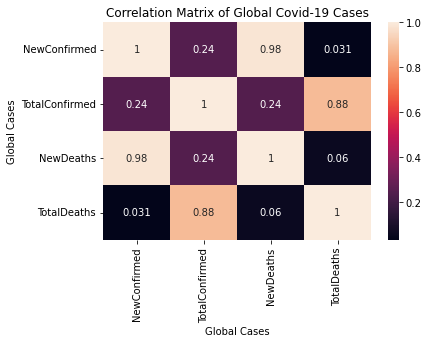

In [39]:
# Create a visual representation heatmap of the correlation matrix using matplot and seaborn
sns.heatmap(covid_dfmatrix, annot=True)
plt.title("Correlation Matrix of Global Covid-19 Cases") #Add title to the correlation matrix
plt.xlabel("Global Cases")
plt.ylabel("Global Cases")
plt.show()

### 3.7 Exploratory Analysis Correlation Matrix Analysis
The correlation matrix is used to represent the correlations between the variables in the covid-19 data frame. Each row and column represents the variable in the data frame. Moreover, each value in the matrix is the correlation coefficient between the variables represented by the row that corresponds to a column. The shade of the boxes in the heat map represents the correlation level, the brighter the shade the stronger the correlation between the two variables. The darker the shade, the lower the correlation between the two variables. All shades of black and purple show a weak correlation between variables that are closer to zero. The lighter shade boxes represent a strong correlation between variables since they are also closer to the value 1.

All elements within the correlation matrix heatmap are positive, but there is a mixture of weak correlations which are closer to the value 0. Moreover, there are strong correlations between variables, which are closer to the value 1. New deaths and total deaths have a correlation value near 0 at 0.06 which indicates the absence of correlation between the two variables. The correlation value for new confirmed cases and new death cases is 0.98 which suggests a strong correlation between the two variables. Additionally, the correlation value of new deaths and new confirmed cases equals 0.88, and the correlation is strong between new deaths and new confirmed cases at a value of 0.98.


### 3.8 Exploratory Analysis Bar Chart (New Deaths By Country)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

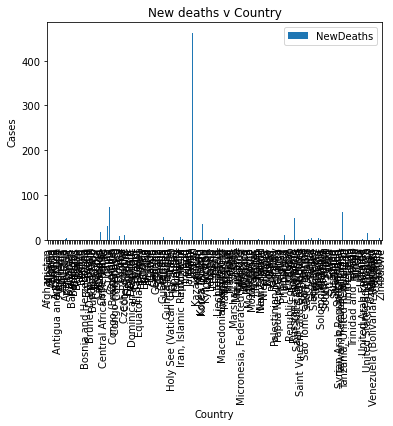

In [41]:
covid_df.plot.bar(x='Country', y='NewDeaths', rot=50, title = 'Country v New Deaths');
plt.title("New deaths v Country") #Add title to the bar chart
plt.xlabel("Country") # Adds x-axis label to the bar chart
plt.ylabel("Cases") # Adds y-axis label to the bar chart
plt.xticks(rotation=90) #Rotates the country labels

### 3.8 Exploratory Analysis (New Deaths by Country)
As illustrated in the country v new deaths bar chart. New deaths remain stable accross the majority of the 197 countrys. However, there are an array of peaks associated with various geographical locations. United States of America is the highest amongst all 197 countrys. 

### 3.9 Exploratory Analysis (New Deaths by Country) 

Text(0, 0.5, 'Cases Quantity')

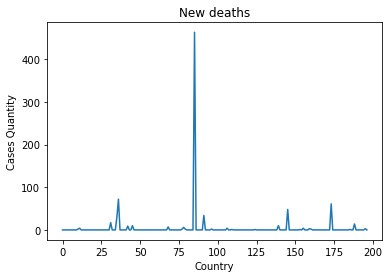

In [44]:
covid_df['NewDeaths'].plot()
plt.title("New deaths")
plt.xlabel("Country") # Adds x-axis label to the bar chart
plt.ylabel("Cases Quantity") # Adds y-axis label to the bar chart

### 3.9 Exploratory Analysis of The New Deaths Figure
As illustrated in figure 3.9, there are a total of 197 countrys on the x-axis, and the y-axis reprsents new death cases in excess of 400. New deaths remain relatively stable accross that of the line chart. However, there is a peak in country 85 which is Japan.  

# Step 4 Ask Questions About the Data

### 4.1 Import the necessary packages for regression models, numpy, matplotlib to support the questions

In [ ]:
import statsmodels.formula.api as smf #Add stats model smf to generate regression models.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib

# 4.2 Question 1
## What is covid-19 deaths influenced by ?
### Subquestion: Are covid-19 deaths likely influenced by 'new confirmed', 'total confirmed' or 'total deaths' and is there any statistical significance at the 5% significance levels?


### Run the regression equation and print

In [50]:
reg1 = 'NewDeaths~NewConfirmed+TotalConfirmed+TotalDeaths' # OLS multiple regression model 
reg1output=smf.ols(reg1,covid_df).fit()
print(reg1output.summary())


                            OLS Regression Results                            
Dep. Variable:              NewDeaths   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     2037.
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          8.73e-146
Time:                        18:24:19   Log-Likelihood:                -629.75
No. Observations:                 197   AIC:                             1268.
Df Residuals:                     193   BIC:                             1281.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6282      0.450      1.

# 4.2 Question 1 Analysis 
## Hypothesis Test 
A hypothesis test is implemented to determine if any of the independent variables have any statistically significant impact on the dependent variable. If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis and confirm there is no statistically significant impact of that independent variable on the dependent variable in the OLS regression model.

### Alternative Hypothesis (H1) = There is a correlation between the inpendent variable and the dependent variable
### Null Hypothesis (H0)= There is no correlation  between the independent variables and the dependant variable

h1 = p-value ≤ 0.05
h0 = p-value ≥ 0.05

## Hypothesis test (New Confirmed Cases)

p-value = 0.000, which is less than 0.05. Therfore, we reject the null hypotheiss and conclude that new confirmed cases has a statistically significany impact on New deaths. This means that it is likely new confirmed cases of covid-19 resulted in new deaths. Since the coeffifient variable is positive at 0.0020, there is a positive correlation between new confirmed cases and New deaths. For every 1 unit increase in new confirmed cases, new deaths increase by that of 0.0020 ceteris paribus (Holding all other factors constant).

## Hypothesis Test (Total Confirmed Cases)
The p-value for the independent variable total confirmed cases is less than 0.05 at 0.000. Therefore, we reject the null hypothesis and conclude that total confirmed cases had a statistically significant impact on the dependent variable new deaths. This means that total confirmed covid-19 cases is negatively correlated to new covid-19 related deaths. For every increase of 1 unit total confirmed cases of covid-19, new deaths decreases by -4.306% - ceteris paribus (Holding all other factors constant).

## Hypothesis Test (Total Deaths)

The p-value for the independent variable total deaths is less than 0.05 at 0.000. Therefore, we reject the null hypothesis and conclude that total deaths has a statistically significant impact on New Deaths. The beta coffiecient for total deaths is positive at 4.317. This means that for every  1 unit increase in total deaths, new deaths increases by 4.317 - ceteris paribus (Holding all other factors constant).

Since the r-squared value is approximtely 96.9%. This means that 96.9% of the variation in new confirmed cases, total confirmed cases, and total deaths explain the variation in new deaths. Total confirmed cases, total deaths new confirmed cases are statistically significant st the 5% significance level. However, it is likely that the OLS multiple regression model suffers from ommitted variable bias, meaning there are other factors not included in the regression model that have a statsitically significant impact on the dependent vairable new deaths. 

# 4.3 Question 2
## What are the chances of a new covid-19 case surviving ?
### Subquestion: How likely is a new confirmed case of covid-19 to survive?


In [51]:
covid_df.sum() # A statistical summation of the values in the covid 19 dataframe

Date              2023-01-09T16:13:58.875Z2023-01-09T16:13:58.87...
Country           AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...
NewConfirmed                                                 348653
TotalConfirmed                                            661652292
NewDeaths                                                       813
TotalDeaths                                                 6699906
dtype: object

# 4.3 Question 2 Analysis
This summary was produced in order to capture the total value of each global case type. These figures are then used to produce a survival rate calculation in order to determine the survival rate of new confirmed cases.
Compute New covid-19 deaths divided by New confirmed covid 19 cases
# Calculation
New deaths/New Confirmed = covid-19 death rate
813/348,653 = 0.0023 death rate
1-0.0023 = 99.77% approximte survival rate in global covid-19 cases. This means that out of 348,653 new confirmed covid-19 cases, 347,840 survived. Since, 348,653 * 99.77% = 347,840 survived, whilst 813 did not survive. 


# 4.4 Question 3
## Does geographic location effect covid-19 cases?
### Subquestion: Which Country saw the greatest new death and new confirmed cases for covid-19?

### 4.4 Figure 1: New Confirmed By Country

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

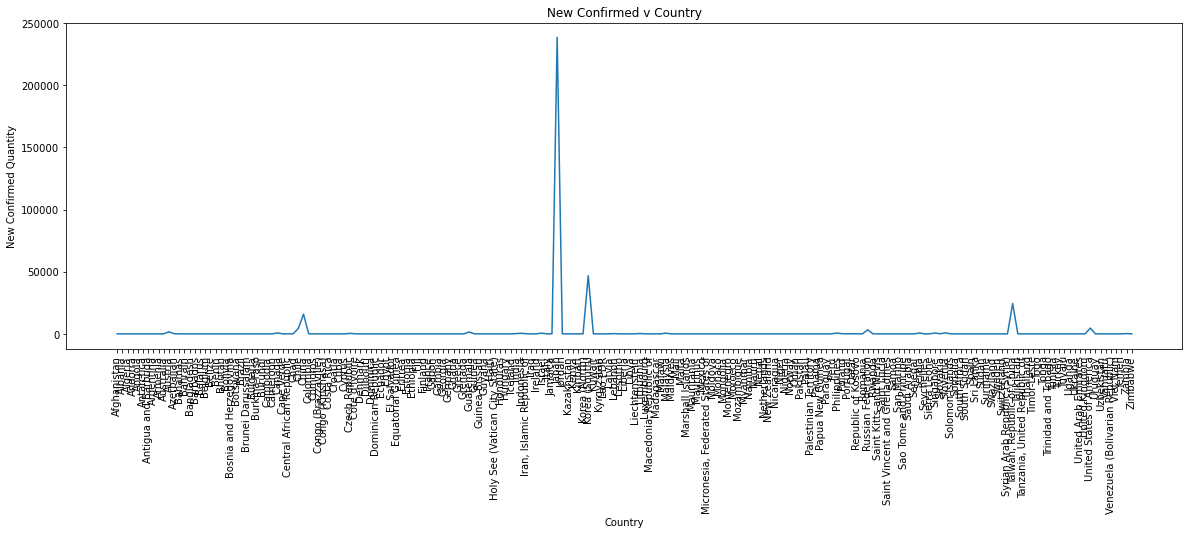

In [54]:
plt.figure(figsize=(20, 6))
plt.plot(covid_df.loc[:, "Country"], covid_df.loc[:,'NewConfirmed']);
plt.title("New Confirmed v Country")
plt.xlabel("Country")
plt.ylabel("New Confirmed Quantity")
plt.xticks(rotation=90) # Rotate the x-axis labels 

### 4.4 Data Frame 1: New Deaths (Descending)

In [55]:
covid_df.sort_values(by = ['NewDeaths'], # Sorts new death cases in descending order
                      axis = 0,
                      ascending=False)


,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths
85,2023-01-09T16:13:58.875Z,Japan,238654,30305173,463,59423
36,2023-01-09T16:13:58.875Z,China,15850,3145501,72,17531
173,2023-01-09T16:13:58.875Z,"Taiwan, Republic of China",24410,9031781,61,15506
145,2023-01-09T16:13:58.875Z,Russian Federation,3284,21515655,48,386105
91,2023-01-09T16:13:58.875Z,Korea (South),46766,29520600,34,32590
35,2023-01-09T16:13:58.875Z,Chile,4419,5062734,30,63330
31,2023-01-09T16:13:58.875Z,Canada,752,3899957,17,44126
188,2023-01-09T16:13:58.875Z,United States of America,4644,101239724,14,1096503
45,2023-01-09T16:13:58.875Z,Czech Republic,375,4582860,10,42196
139,2023-01-09T16:13:58.875Z,Philippines,643,4067170,10,65464


### 4.4 Data Frame 2: New Confirmed (Descending)

In [56]:
covid_df.sort_values(by = ['NewConfirmed'], #Set to false in order to sort the data frame by New Confirmed cases in descending order
                      axis = 0,
                      ascending=False)


,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths
85,2023-01-09T16:13:58.875Z,Japan,238654,30305173,463,59423
91,2023-01-09T16:13:58.875Z,Korea (South),46766,29520600,34,32590
173,2023-01-09T16:13:58.875Z,"Taiwan, Republic of China",24410,9031781,61,15506
36,2023-01-09T16:13:58.875Z,China,15850,3145501,72,17531
188,2023-01-09T16:13:58.875Z,United States of America,4644,101239724,14,1096503
35,2023-01-09T16:13:58.875Z,Chile,4419,5062734,30,63330
145,2023-01-09T16:13:58.875Z,Russian Federation,3284,21515655,48,386105
10,2023-01-09T16:13:58.875Z,Austria,1641,5724215,2,21484
68,2023-01-09T16:13:58.875Z,Guatemala,1527,1211008,7,20017
160,2023-01-09T16:13:58.875Z,Slovenia,835,1313501,2,7025


### 4.4 Question 3 Analysis
The top 5 countrys which has the greatest sum of new deaths is the Japan in first place with 463, China with 72, Taiwan with 61, Russia with 48, and in the 5th country to have the highest new death is South Koreo with 34. The top 5 countries with the highest new cofirmed covid-19 cases includes Japan with 238,654, South Korea with 46,766, Taiwan (Republic of China) with 24,410, Chine with 15,850, and the United States of America with 4,644. As a result, the data shows that Japan, South Korea, Taiwan and China have seen the largest quantity of new confirmed and new death covid-19 cases out of a total of 197 global countries. As a result of this, geographical location does have an impact on new death and new confirmed cases. In addition to that, countries such as Zimbabwe, Iceland, Hungary, Honduras, Holy See (Vatican City State), Haiti, Guyana, Guinea-Bissau are just some of the countrys that have no recorded new confirmed, and new death covid-19 cases.

# Step 5 Conclusion

By using an ordinary least squares multiple regression model the findings can be used to explore and analyse the variables by which covid-19 may be influenced. The findings from the hypothesis tests and associated p-values revealed that global total confirmed, total deaths, and global new confirmed covid-19 cases all had statistically significant impacts on global new death cases as the p-values were less than 0.05. The chances of global new confirmed cases surviving covid-19 are high which is approximately 99.77% of new confirmed cases not resulting in new death cases. However, 813 did not survive out of the total 348,653 global new confirmed covid-19 cases. New confirmed cases, and new deaths are significantly higher across certain geographical locations. In particular, as revealed on the first graph of Japan, China, Taiwan, Russia, and South Korea new death cases are significantly higher compared to that of the other countries. Moreover, as illustrated in the second graph of question 3 Japan saw the largest peak in new confirmed cases out of all 197 countrys.\n",
   
There are several ideas of interest for further research. As regression analysis allows for testing the statistical significance of independent variables on dependent variables by implementing hypothesis testing of the p-values. It is possible that the regression model may not include other factors that influence the variation in new death cases. For example, it would be interesting to control for the omitted variable bias and improve the strength of the regression model. By including variables such as the number of vaccines across the 197 countries to test if vaccinations had any statistically significant impact on reducing new death cases. Moreover, the quantity type of vaccine administered for each of the 197 countries can be added to explore if any of the vaccines were more effective in reducing the new death cases by country. In addition to this, hospital data regarding the number of available beds, and the headcount of nurses can also have an impact on new death cases. Covid-19 new death cases may be more prominent based on geographical location. For example, developing countries with less population vaccinated may be more likely to see an increase in new death cases. Other relevant data on covid-19 cases in each major city across 197 global countries make for useful further research. Furthermore, disease-related data may also have a statistically significant impact on new death cases throughout the 197 glad countries. Therefore, it would be interesting to research if any health disease such as heart arrhythmia, asthma, or cancer may have a statistically significant impact on new death cases related to covid-19.